apra.diu@gmail.com

## Answer : 1

In [ ]:
import numpy as np
import pandas as pd


df = pd.read_csv("/content/final-employee-ds.csv")
df.head()

,EmployeeID,Name,Age,Gender,Department,ExperienceYears,Salary,WorkHoursPerWeek,PerformanceScore,JoinDate,Tshirt_size,ProjectCount,TrainingHours,DepartmentRating
0,101,Employee_1,50,Male,IT,17,86175.0,44,71,2010-01-10,L,2,4,1
1,102,Employee_2,36,Male,Finance,1,47805.0,44,68,2017-11-11,S,4,18,4
2,103,Employee_3,29,Male,Marketing,16,45237.0,44,69,2012-03-08,S,6,13,3
3,104,Employee_4,42,Male,Marketing,12,60056.0,48,76,2012-10-12,M,2,25,4
4,105,Employee_5,40,Female,Finance,19,85543.0,36,97,2014-12-30,XL,8,3,4


In [ ]:
training_hours = df['TrainingHours'].to_numpy() # TrainingHours column into a NumPy array.
training_hours = training_hours.astype(float) # Convert to float datatype.
mean = np.mean(training_hours) # mean.
std = np.std(training_hours) # standard deviation.
print(f"Mean: {mean}")
print(f"Standard Deviation: {std}")

Mean: 24.19
Standard Deviation: 13.842467265628624


## Answer : 2

In [ ]:
df['Salary'] = df.groupby('Department')['Salary'].transform(lambda x: x.fillna(x.median())) # fill value with department-wise median
filtered_emp_df = df[(df['ExperienceYears'] > 12) & (df['ProjectCount'] > 5)] # filter employee according to condition
total_salary_sum = filtered_emp_df['Salary'].sum() # sum of total salary

print(f"Total Salary Sum: {total_salary_sum}")

Total Salary Sum: 1985775.5


## Answer : 3

In [ ]:
filtered_df = df[((df['Department'] == 'IT') | (df['Department'] == 'Finance')) &
                 (df['Age'].between(30, 45)) &
                 (df['PerformanceScore'] > 88)
] #filter employee according to condition

sorted_df = filtered_df.sort_values(by='Salary', ascending=False) # sort by Salary descending
new_df = sorted_df[['Name', 'Department', 'Salary', 'PerformanceScore']]
new_df

,Name,Department,Salary,PerformanceScore
94,Employee_95,IT,140386.0,94
88,Employee_89,Finance,126027.0,92
4,Employee_5,Finance,85543.0,97
32,Employee_33,IT,83919.0,98
55,Employee_56,Finance,49540.0,94


## Answer : 4

In [ ]:
df['SalaryPerHour'] = df['Salary'] / (df['WorkHoursPerWeek'] * 4) # new column
sorted_df = df.sort_values(by='SalaryPerHour', ascending=False) # sort by salary per hour
top_5_employees = sorted_df.head(5) # filter top 5 employees
result_df = top_5_employees[['Name', 'SalaryPerHour']]
result_df


,Name,SalaryPerHour
46,Employee_47,981.278571
27,Employee_28,971.292857
31,Employee_32,967.392857
79,Employee_80,945.335526
80,Employee_81,937.858974


## Answer : 5

<Figure size 1000x600 with 0 Axes>

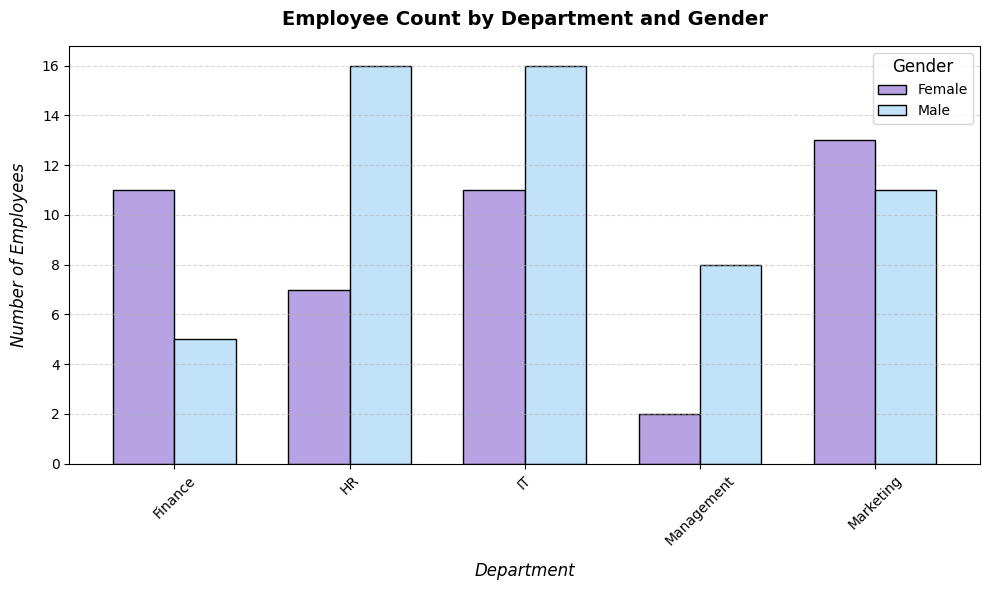

In [ ]:
import matplotlib.pyplot as plt

# Create bar chart
plt.figure(figsize=(10, 6))
df.groupby(["Department", "Gender"]).size().unstack().plot(
    kind="bar",
    stacked=False,
    width=0.7,
    linewidth=1,
    color=["#B7A3E3", "#C2E2FA"],
    edgecolor="black",
    figsize=(10, 6),
)

# Chart labels and title
plt.title("Employee Count by Department and Gender", fontsize=14, fontweight ='bold', pad = 15)
plt.xlabel("Department", fontsize=12, fontstyle='italic', labelpad=10)
plt.ylabel("Number of Employees", fontsize=12, fontstyle='italic', labelpad=10)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Gender", title_fontsize=12, fontsize=10, loc="upper right" , frameon=True)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()